# **🪴 Análasis supervisado de deforestación - Departamento del chocó**

Proyecto educativo de inteligencia artificial

**📌 Enfoque**: Aprendizaje supervisado con Randow Forest

Este notebook ilustra cómo aplicar un modelo supervisado para predecir si un área presenta alta o baja deforestación, utilizando datos geográficos y temporales del Chocó

- **🔗 Fuente de datos**: [AREAS DEFORESTADAS CHOCO](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/AREAS-DEFORESTADAS-CHOCO/iczg-dyt3/about_data)

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Cargar datos
df = pd.read_csv('Datos/AREAS_DEFORESTADAS_CHOCO_20251112.csv')
print('Dimensiones del dataset:', df.shape)
df.head()

Dimensiones del dataset: (7937, 10)


,ID,TIPO GEOMETRIA,AÑO,IMAGEN,CAUSA,AREA_Ha,OBSERVACION,LATITUD,LONGITUD,MUNICIPIO
0,7463,Polygon,"2,020",T18PTQ_20200201T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.126512,Ninguna,"8° 22' 43,726"" N","77° 14' 19,019"" W",ACANDÍ
1,4659,Polygon,"2,019",T18PTQ_20190527T153621_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.14072,Ninguna,"8° 30' 47,551"" N","77° 19' 30,507"" W",ACANDÍ
2,7459,Polygon,"2,020",T18PTQ_20200112T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.14125,Ninguna,"8° 22' 30,966"" N","77° 13' 49,720"" W",ACANDÍ
3,9719,Polygon,"2,021",T18PTQ_20201202T153619_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.158066,Ninguna,"8° 36' 11.256"" N","77° 20' 50.757"" W",ACANDÍ
4,7464,Polygon,"2,020",T18PTQ_20200201T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.184549,Ninguna,"8° 22' 22,008"" N","77° 14' 3,921"" W",ACANDÍ


In [4]:
# Tipos de datos de cada columna
df.dtypes

ID                 int64
TIPO GEOMETRIA    object
AÑO               object
IMAGEN            object
CAUSA             object
AREA_Ha           object
OBSERVACION       object
LATITUD           object
LONGITUD          object
MUNICIPIO         object
dtype: object

In [5]:
# Resumen más completo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7937 entries, 0 to 7936
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              7937 non-null   int64 
 1   TIPO GEOMETRIA  7937 non-null   object
 2   AÑO             7937 non-null   object
 3   IMAGEN          5901 non-null   object
 4   CAUSA           7718 non-null   object
 5   AREA_Ha         7937 non-null   object
 6   OBSERVACION     7937 non-null   object
 7   LATITUD         7930 non-null   object
 8   LONGITUD        7930 non-null   object
 9   MUNICIPIO       7937 non-null   object
dtypes: int64(1), object(9)
memory usage: 620.2+ KB


In [6]:
# Contar columnas categóricas - Normalmente son tipo Object o Category
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cat = len(cat_cols)
print("Columnas categóricas:", num_cat)
print("Nombre:", list(cat_cols))

Columnas categóricas: 9
Nombre: ['TIPO GEOMETRIA', 'AÑO', 'IMAGEN', 'CAUSA', 'AREA_Ha', 'OBSERVACION', 'LATITUD', 'LONGITUD', 'MUNICIPIO']


In [7]:
# Contar columnas númericas int64 o float64
cont_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cont = len(cont_cols)
print("Columnas númericas:", num_cont)
print("Nombre:", list(cont_cols))

Columnas númericas: 1
Nombre: ['ID']


In [8]:
# Total de valores nulos por columna
print(df.isnull().sum())

ID                   0
TIPO GEOMETRIA       0
AÑO                  0
IMAGEN            2036
CAUSA              219
AREA_Ha              0
OBSERVACION          0
LATITUD              7
LONGITUD             7
MUNICIPIO            0
dtype: int64


In [9]:
# Verificar tipo de área de AREA_Ha
print("Tipo de dato original de AREA_Ha:", df["AREA_Ha"].dtype)

Tipo de dato original de AREA_Ha: object


In [10]:
# Convertir a númerico
df["AREA_Ha"] = pd.to_numeric(df["AREA_Ha"],errors="coerce")
print("Tipo de dato despues de convertir AREA_Ha:", df["AREA_Ha"].dtype)

Tipo de dato despues de convertir AREA_Ha: float64


In [11]:
# Tipos de datos de cada columna
df.dtypes

ID                  int64
TIPO GEOMETRIA     object
AÑO                object
IMAGEN             object
CAUSA              object
AREA_Ha           float64
OBSERVACION        object
LATITUD            object
LONGITUD           object
MUNICIPIO          object
dtype: object

In [12]:
# Revisar si hubo valores no convertidos
n_no_numericos = df["AREA_Ha"].isna().sum()
print(f"Valores no númericos convertidos a NaN: {n_no_numericos}")

Valores no númericos convertidos a NaN: 9


In [13]:
# Eliminar filas donde una columna tenga valores nulos
df = df.dropna(subset=["AREA_Ha"])

In [14]:
# Revisar si hubo valores no convertidos
n_no_numericos = df["AREA_Ha"].isna().sum()
print(f"Valores no númericos convertidos a NaN: {n_no_numericos}")

Valores no númericos convertidos a NaN: 0


## **1. Distribucción General**

Historigrama para ver como se distribuyen las áreas deforestadas

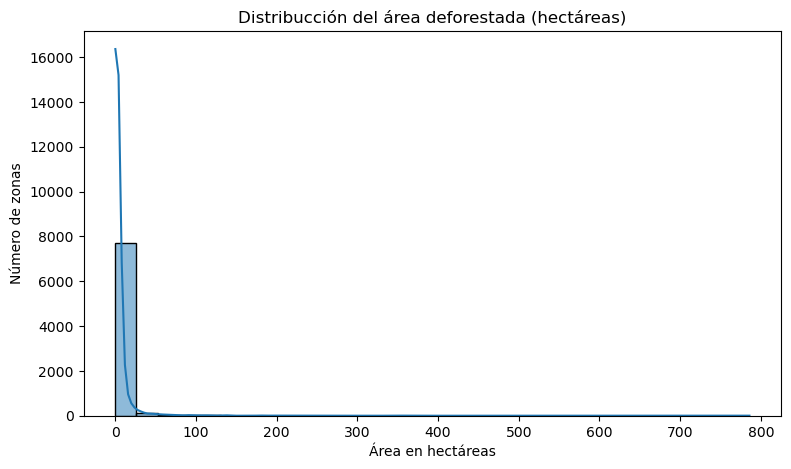

In [15]:
import seaborn as sns
df["AREA_Ha"] = df["AREA_Ha"].astype(float)

# Crear Historigrama
plt.figure(figsize=(9,5))
sns.histplot(df["AREA_Ha"],bins=30, kde=True)
plt.title("Distribucción del área deforestada (hectáreas)")
plt.xlabel("Área en hectáreas")
plt.ylabel("Número de zonas")
plt.show()

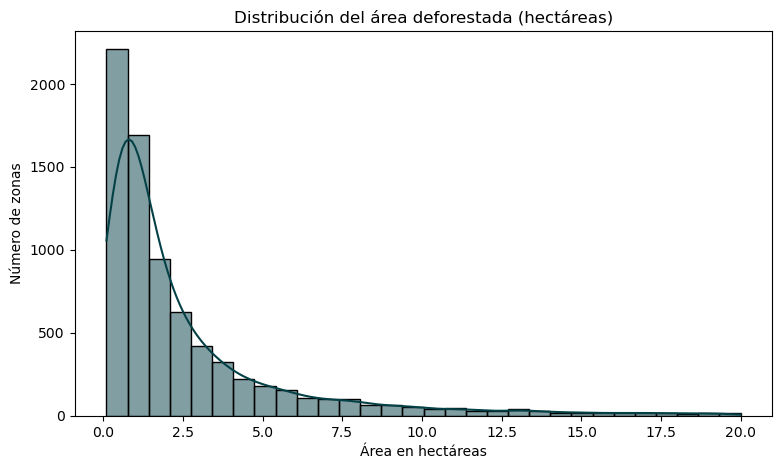

In [16]:
import seaborn as sns
df['AREA_HaF'] = df['AREA_Ha'].where((df['AREA_Ha']>=0) & (df['AREA_Ha']<=20))

#Crear histograma
plt.figure(figsize=(9,5))
sns.histplot(df['AREA_HaF'],bins=30,kde=True,color="#044146")
plt.title("Distribución del área deforestada (hectáreas)")
plt.xlabel('Área en hectáreas')
plt.ylabel("Número de zonas")
plt.show()

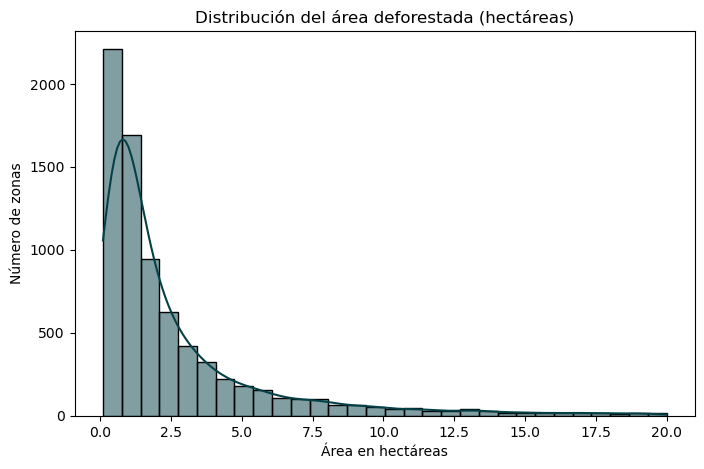

In [17]:
import seaborn as sns
df['AREA_HaF'] = df['AREA_Ha'].where((df['AREA_Ha']>=0) & (df['AREA_Ha']<=20))

#Crear histograma
plt.figure(figsize=(8,5))
sns.histplot(df['AREA_HaF'],
             bins=30,
             kde=True,
             color="#044146",
             edgecolor="black"
             )
plt.title("Distribución del área deforestada (hectáreas)")
plt.xlabel('Área en hectáreas')
plt.ylabel("Número de zonas")
plt.show()

**Interpretación:** 
- Las barras altas muestras los rangos más comunes de áeras
- La línea suave muestra la forma general de la distribución

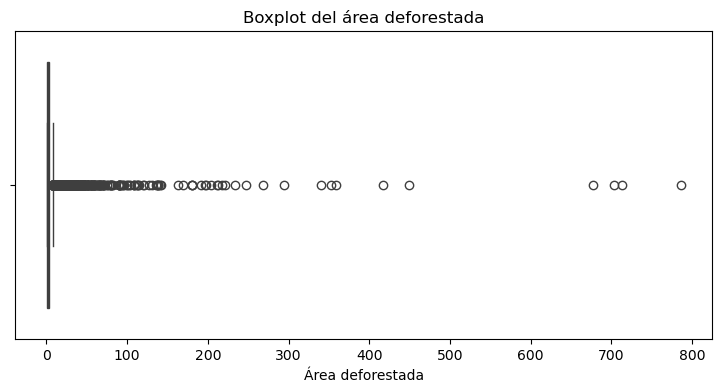

In [18]:
# Boxplot - Diagrama de caja
plt.figure(figsize=(9,4))
sns.boxplot(x=df["AREA_Ha"])
plt.title("Boxplot del área deforestada")
plt.xlabel("Área deforestada")
plt.show()

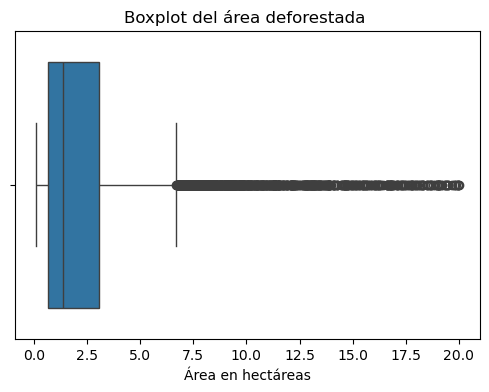

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['AREA_HaF'])
plt.title("Boxplot del área deforestada ")
plt.xlabel("Área en hectáreas")
plt.show()

## **Evolución temporal**

Gráfico de barras de deforestación por año

Permite ver cómo ha cambiado la deforestación entre los años 2014 - 2021

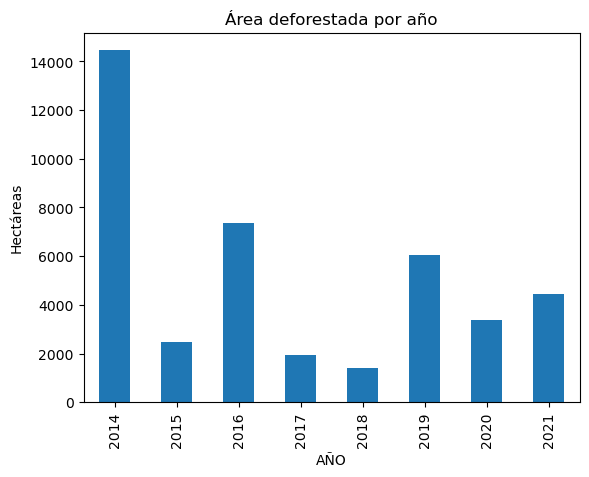

In [20]:
df['AÑO']=df['AÑO'].str.replace(',','').astype(int)
df.groupby('AÑO')['AREA_Ha'].sum().plot(kind='bar')
plt.title("Área deforestada por año")
plt.ylabel("Hectáreas")
plt.show()

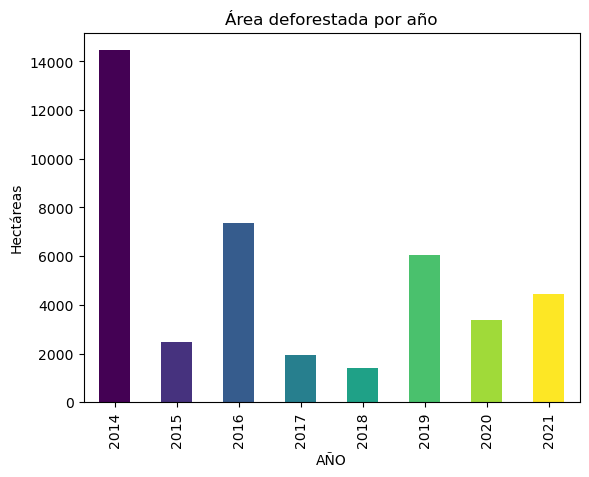

len(data: 8
np.linspace(0,1,len(data): [0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 1.        ]


In [21]:
# viridis, plasma, inferno, tab20, cool
data = df.groupby('AÑO')['AREA_Ha'].sum()
colors= plt.cm.viridis(np.linspace(0,1,len(data)))
data.plot(kind='bar',color=colors)
plt.title("Área deforestada por año")
plt.ylabel("Hectáreas")
plt.show()
print("len(data:",len(data))
print("np.linspace(0,1,len(data):",np.linspace(0,1,len(data)))

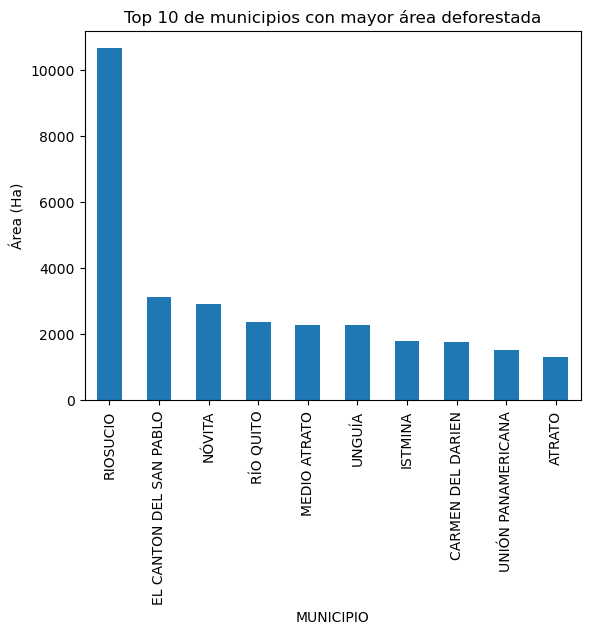

In [22]:
# Top 10 municipios con mayor área deforestada
df.groupby('MUNICIPIO')['AREA_Ha'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 de municipios con mayor área deforestada")
plt.ylabel("Área (Ha)")
plt.show()

In [23]:
df.head()

,ID,TIPO GEOMETRIA,AÑO,IMAGEN,CAUSA,AREA_Ha,OBSERVACION,LATITUD,LONGITUD,MUNICIPIO,AREA_HaF
0,7463,Polygon,2020,T18PTQ_20200201T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.126512,Ninguna,"8° 22' 43,726"" N","77° 14' 19,019"" W",ACANDÍ,0.126512
1,4659,Polygon,2019,T18PTQ_20190527T153621_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.140720,Ninguna,"8° 30' 47,551"" N","77° 19' 30,507"" W",ACANDÍ,0.140720
2,7459,Polygon,2020,T18PTQ_20200112T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.141250,Ninguna,"8° 22' 30,966"" N","77° 13' 49,720"" W",ACANDÍ,0.141250
3,9719,Polygon,2021,T18PTQ_20201202T153619_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.158066,Ninguna,"8° 36' 11.256"" N","77° 20' 50.757"" W",ACANDÍ,0.158066
4,7464,Polygon,2020,T18PTQ_20200201T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.184549,Ninguna,"8° 22' 22,008"" N","77° 14' 3,921"" W",ACANDÍ,0.184549


### **Convierte las coordenadas (Latitud y Longitud) a decimales**

In [24]:
import re
def dms_a_decimal(coord):
    """
    Convierte coordenadas DMS (tipo '8° 30' 47,551" N' o '77° 14' 19,019" W') a decimal.
    Soporta formatos con comas o puntos decimales.
    Devuelve NaN si el formato no se reconoce.
    """
    if pd.isna(coord):
        return np.nan

    # Limpiar espacios y normalizar comillas
    coord = str(coord).strip().replace("″", '"').replace("’", "'").replace("”", '"')

    # Expresión regular mejorada
    match = re.match(
        r'(\d+)[°\s]+(\d+)?[\'\s]*(\d+[.,]?\d*)?"?\s*([NnSsEeOoWw])',
        coord
    )

    if not match:
        return np.nan

    grados = float(match.group(1))
    minutos = float(match.group(2)) if match.group(2) else 0
    segundos = float(str(match.group(3)).replace(',', '.')) if match.group(3) else 0
    direccion = match.group(4).upper()

    # Conversión a decimal
    decimal = grados + (minutos / 60) + (segundos / 3600)

    # Si es Sur (S), Oeste (O), o West (W), hacer negativo
    if direccion in ['S', 'O', 'W']:
        decimal *= -1

    return decimal

### **🗺️ Mapa geográfico**

In [25]:
# Aplicar la conversión a todo el DataFrame
df['LATITUD_DECIMAL'] = df['LATITUD'].apply(dms_a_decimal)
df['LONGITUD_DECIMAL'] = df['LONGITUD'].apply(dms_a_decimal)
# Revisar los primeros valores
df[['LATITUD','LONGITUD','LATITUD_DECIMAL','LONGITUD_DECIMAL']].head()

,LATITUD,LONGITUD,LATITUD_DECIMAL,LONGITUD_DECIMAL
0,"8° 22' 43,726"" N","77° 14' 19,019"" W",8.378813,-77.238616
1,"8° 30' 47,551"" N","77° 19' 30,507"" W",8.513209,-77.325141
2,"8° 22' 30,966"" N","77° 13' 49,720"" W",8.375268,-77.230478
3,"8° 36' 11.256"" N","77° 20' 50.757"" W",8.603127,-77.347432
4,"8° 22' 22,008"" N","77° 14' 3,921"" W",8.372780,-77.234423


In [26]:
import folium
mapa = folium.Map(location=[5.7, -76.8],zoom_start=7)
for _, row in df.head(100).iterrows():
  folium.CircleMarker([row['LATITUD_DECIMAL'],row['LONGITUD_DECIMAL']],radius=3,color='red').add_to(mapa)
mapa

In [27]:
df.nlargest(20,'AREA_Ha')

,ID,TIPO GEOMETRIA,AÑO,IMAGEN,CAUSA,AREA_Ha,OBSERVACION,LATITUD,LONGITUD,MUNICIPIO,AREA_HaF,LATITUD_DECIMAL,LONGITUD_DECIMAL
3640,5093,Polygon,2014,NaN,Minería,785.882401,Ninguna,"6° 3' 8,981"" N","76° 35' 41,666"" W",MEDIO ATRATO,NaN,6.052495,-76.594907
2665,1478,Polygon,2015,NaN,Desconocida,713.636508,Ninguna,"4° 3' 57,108"" N","76° 51' 36,013"" W",EL LITORAL DEL SAN JUAN,NaN,4.065863,-76.860004
6782,2794,Polygon,2016,LC80100552015082LGN00_b1b7.tif - LC80100552016...,Incendio,703.896457,Ninguna,"7° 32' 37,661"" N","76° 57' 42,569"" W",RIOSUCIO,NaN,7.543795,-76.961825
6781,2795,Polygon,2016,LC80100552015082LGN00_b1b7.tif - LC80100552016...,Incendio,677.570024,Ninguna,"7° 31' 33,300"" N","76° 56' 10,890"" W",RIOSUCIO,NaN,7.525917,-76.936358
6780,2822,Polygon,2016,NaN,Desconocida,448.914747,Ninguna,"7° 31' 1,896"" N","76° 59' 33,220"" W",RIOSUCIO,NaN,7.517193,-76.992561
6779,2789,Polygon,2016,LC80100552016293LGN00_B4B6.tif - LC80100552016...,Cultivo,416.754268,Ninguna,"7° 39' 49,901"" N","77° 19' 10,509"" W",RIOSUCIO,NaN,7.663861,-77.319586
7936,5902,Polygon,2017,NaN,Minería,358.591495,Ninguna,"5° 17' 5,200"" N","76° 39' 58,644"" W",UNIÓN PANAMERICANA,NaN,5.284778,-76.666290
3728,5924,Polygon,2019,T18NUL_20190522T153629_TCI_10m.jp2,Desconocida,353.077640,Ninguna,"5° 3' 28,689"" N","76° 44' 28,254"" W",MEDIO SAN JUAN,NaN,5.057969,-76.741182
7787,2945,Polygon,2019,S2B_T18NTP_20190313T153619_TCI_10m.jp2 - S2B_T...,Incendio,339.601808,Ninguna,"7° 58' 14,407"" N","77° 5' 41,917"" W",UNGUÍA,NaN,7.970669,-77.094977
2474,5442,Polygon,2014,NaN,Minería,293.995915,Ninguna,"5° 23' 2,944"" N","76° 44' 46,582"" W",EL CANTON DEL SAN PABLO,NaN,5.384151,-76.746273


In [28]:
mapa = folium.Map(location=[5.7, -76.8],zoom_start=7)
for _, row in df.nlargest(10,'AREA_Ha').iterrows():
  folium.CircleMarker([row['LATITUD_DECIMAL'],row['LONGITUD_DECIMAL']],radius=2,color='red').add_to(mapa)
mapa

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7928 entries, 0 to 7936
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7928 non-null   int64  
 1   TIPO GEOMETRIA    7928 non-null   object 
 2   AÑO               7928 non-null   int64  
 3   IMAGEN            5893 non-null   object 
 4   CAUSA             7709 non-null   object 
 5   AREA_Ha           7928 non-null   float64
 6   OBSERVACION       7928 non-null   object 
 7   LATITUD           7921 non-null   object 
 8   LONGITUD          7921 non-null   object 
 9   MUNICIPIO         7928 non-null   object 
 10  AREA_HaF          7604 non-null   float64
 11  LATITUD_DECIMAL   7921 non-null   float64
 12  LONGITUD_DECIMAL  7921 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 867.1+ KB
